In [2]:
import json 
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
with open('./NYCounties.json') as json_file:
    counties = json.load(json_file)

In [42]:
with open('./radviz_demographic_data.json') as json_file:
    county_names = json.load(json_file)

In [43]:
county_names2 = []
for point in county_names:
    county_names2.append(point['county_name'])

In [44]:
county_names = []
for feature in counties['features']:
    name = feature['properties']['NAMELSAD20']
#     id1 = feature['properties']['COUNTYFP20']
#     id2 = feature['properties']['COUNTYNS20']
#     county_names.append({'name':name, 'id1': id1, 'id2': id2})
    county_names.append(feature['properties']['NAMELSAD20'])

In [45]:
county_names.sort()
county_names2.sort()

In [46]:
if len(county_names) != len(county_names2):
    print('not the same length')
for i in range(0, len(county_names)):
    if county_names[i] != county_names2[i]:
        print(county_names[i], county_names2[i])

### Add color to properties of each feature.

In [47]:
for county in counties['features']:
    prop = county['properties']
    prop['color'] = 'hsl(180, 100%, 50%)'
    county['properties'] = prop

In [52]:
f = open("./NYCounties2.json", "w")
f.write(str(counties).replace("'", '"'))
f.close()

### Outliars.

In [43]:
data

,county_name,age_median,white_ratio,income_per_capita
0,Albany County,37.8,0.767429,19258333
1,Allegany County,39.0,0.956530,1666839
2,Bronx County,33.9,0.450644,56318621
3,Broome County,39.7,0.866888,8831155
4,Cattaraugus County,41.8,0.922287,3179730
...,...,...,...,...
57,Washington County,43.8,0.945335,2581625
58,Wayne County,43.6,0.937614,4305806
59,Westchester County,40.9,0.740599,109790050
60,Wyoming County,42.6,0.923279,1720948


2 sd away,  Kings County, Nassau County, New York County, 


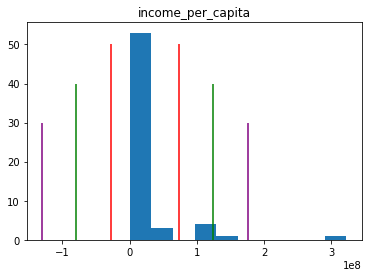

2 sd away,  Hamilton County, Jefferson County, Tompkins County, 


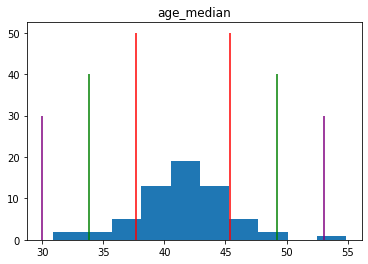

2 sd away,  Bronx County, Kings County, Queens County, 


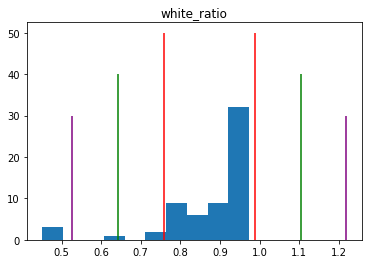

In [137]:
data = pd.read_json('./radviz_demographic_data.json')
data.set_index('county_name', inplace = True)
dimensions = ['income_per_capita', 'age_median', 'white_ratio']
for dim in dimensions:
    mu = data[dim].mean()
    sd = data[dim].std()
    for sd_away in [2]:
        print("{} sd away, ".format(sd_away), end=' ')
        for county in data[dim].items():
            if(abs((county[1] - mu) / sd ) > sd_away):
                print(county[0], end=', ')
                
        print('')
    plt.title(dim)
    plt.hist(data[dim])
    plt.vlines(x = [(mu - sd), (mu + sd)], ymin=0, ymax=50, color='red')
    plt.vlines(x = [(mu - 2*sd),(mu + 2*sd)] , ymin=0, ymax=40, color='green')
    plt.vlines(x = [(mu - 3*sd), (mu + 3*sd)], ymin=0, ymax=30, color='purple')
    plt.show()